This notebook aims to get the color of a piece on a square.

## Import

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import utils as u

/Users/Mathian/Documents/IA/Vision_par_ordinateur/VisualChess/code


## Load images

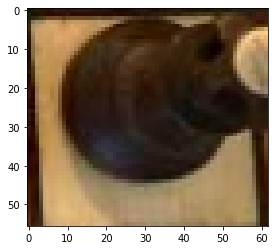

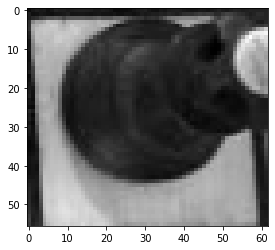

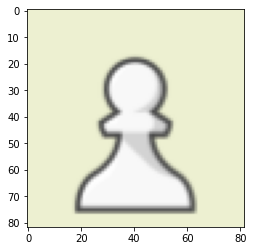

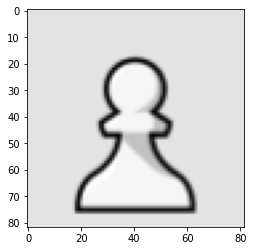

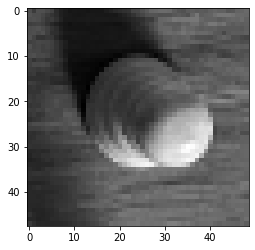

In [2]:
BoW_rgb = u.show_and_get_colored_img('.././photos_test/square/with_pieces/black_on_white_g.png')
BoW_g = u.show_and_get_gray_img('.././photos_test/square/with_pieces/black_on_white_g.png')

WoW_rgb = u.show_and_get_colored_img('.././photos_test/square/with_pieces/white_on_white_c.png')
WoW_g = u.show_and_get_gray_img('.././photos_test/square/with_pieces/white_on_white_c.png')

WoB_g = u.show_and_get_gray_img('.././photos_test/square/with_pieces/white_on_black_m.png')

The idea is to derermine the color of a piece by focusing on the center of the square. We want to avoid the edge effect (presence of another piece in the side of the square). We only keep the quarter of pixel located at the center.

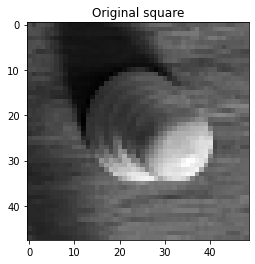

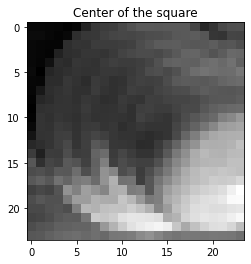

In [3]:
def get_central_part_of_square(img):
    X, Y = img.shape
    return img[int(X/4):int(3*X/4), int(Y/4):int(3*Y/4)]

plt.imshow(WoB_g, cmap='gray')
plt.title('Original square')
plt.show()
central_WoB_g = get_central_part_of_square(WoB_g)
plt.imshow(central_WoB_g, cmap='gray')
plt.title('Center of the square')
plt.show()


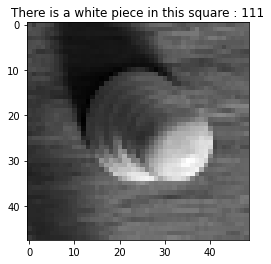

False

In [12]:
def is_piece_black(img, treshold = 100 ):
    central_img = get_central_part_of_square(img)
    whiteness = np.mean(central_img)
    is_black = whiteness < treshold
    if is_black:
        title = 'There is a black piece in this square : ' +  str(int(whiteness))
    else :
        title = "There is a white piece in this square : " +  str(int(whiteness))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()
    return is_black

is_piece_black(WoB_g)

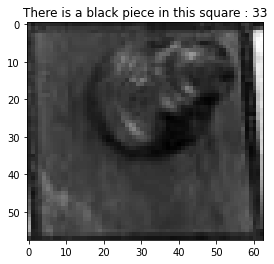

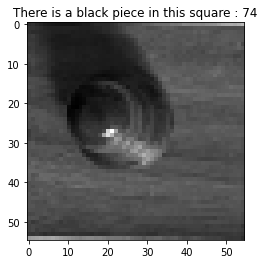

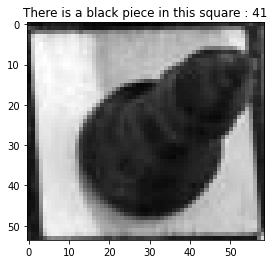

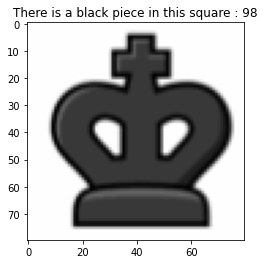

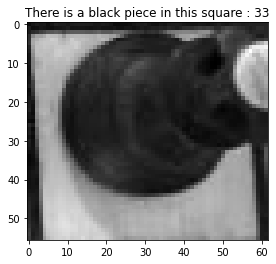

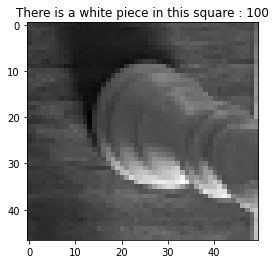

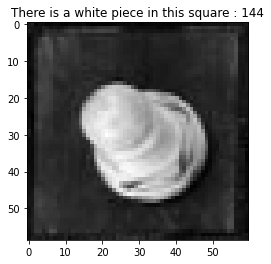

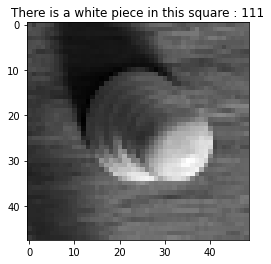

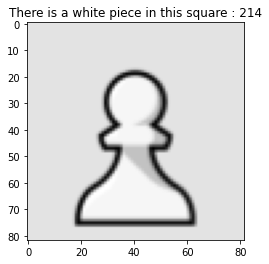

5  black pieces detected on 9 images


In [14]:
pieces_path = '.././photos_test/square/with_pieces/'

def get_result_for_folder(folder_path):
    img_paths = u.get_list_img_path(folder_path)
    nb_img = len(img_paths)
    black_pieces_detected = 0
    for img_path in img_paths:
        img = cv2.imread(img_path,0)
        black_pieces_detected += is_piece_black(img, treshold = 100 )
    print(black_pieces_detected, ' black pieces detected on', nb_img, 'images' )

get_result_for_folder(pieces_path)